In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\Lenovo\\Documents\\Summer internship\\Machine Learning\\Linkedin Review project\\linkedin-reviews.csv")

In [3]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


# Exploratory Data Analysis
We will start by analyzing the distributions of ratings. It will provide insight into the overall sentiment of the reviews. Then we can explore further, such as analyzing the length of reviews, and possibly derive insights from the text of the reviews.

# Plotting the Distribution of Ratings

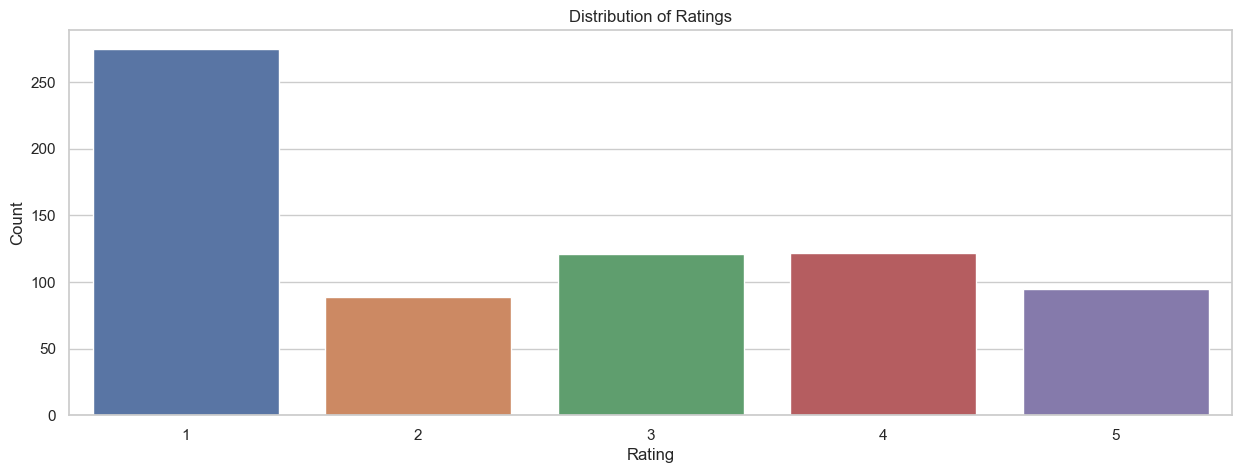

In [11]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Adding Sentiment Labels in the Data
We will use Textblob library. Textblob provides a polarity scores raning from -1 (very negative) to 1(very positive) for a given text. We can use this score to classify each review's sentiment as positive, negative or neutral.

In [18]:
#!pip install textblob

In [15]:
from textblob import TextBlob

In [19]:
def textblob_sentiment_analysis (review): 
    sentiment = TextBlob (review).sentiment 
    if sentiment.polarity > 0.1 : 
        return 'Positive'
    elif sentiment.polarity<-0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [20]:
df['Sentiment']=df['Review'].apply(textblob_sentiment_analysis)

In [22]:
df.sample(5)

,Review,Rating,Sentiment
413,Not working after latest update.,1,Positive
573,great,5,Positive
658,Good enough :),4,Positive
280,Takes forever to load on my EVO Shift. I unins...,1,Neutral
151,Every action takes way too long to load. Worse...,2,Negative


# Analyzing App Review Sentiment

In [26]:
sentiment_distribution=df['Sentiment'].value_counts()
sentiment_distribution

Sentiment
Positive    298
Neutral     297
Negative    107
Name: count, dtype: int64

Text(0, 0.5, 'Count')

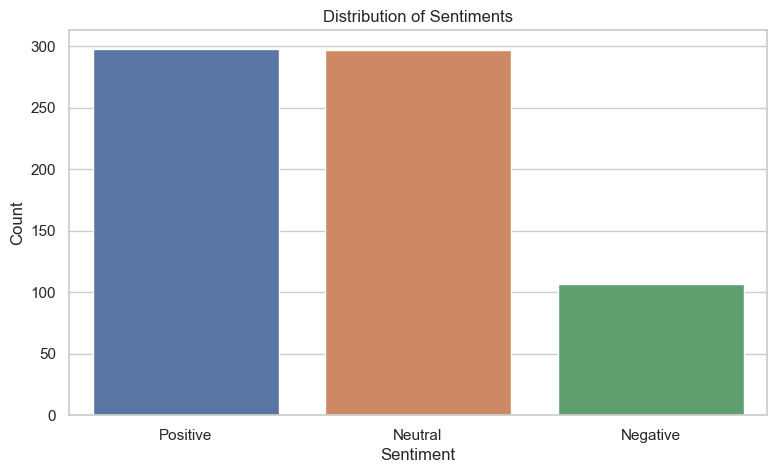

In [27]:
plt.figure(figsize = (9,5))
sns.barplot(x = sentiment_distribution.index,
y = sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# So, we can see althrough the app has low ratings, still the reviewers don't use many negative words in the reviews for the app.
Next, we'll explore the relationship between the sentiments and the ratings. This analysis can help us understand whether there is a correlation between the sentiment of the text and numerical ratings.

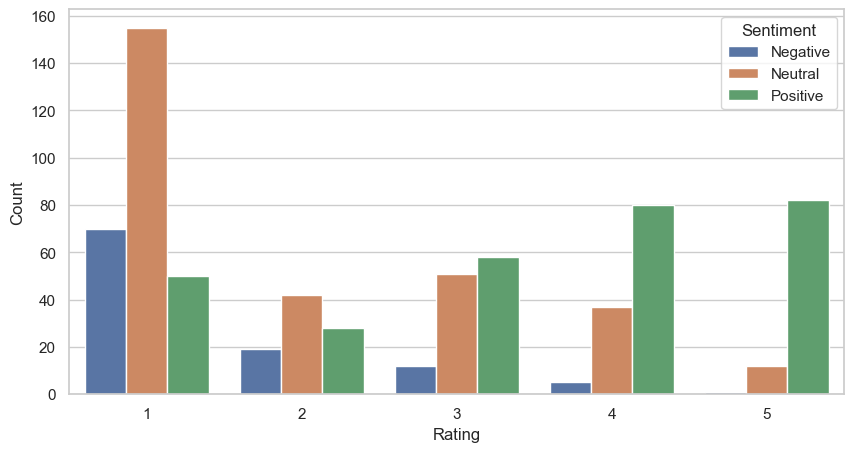

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,
             x='Rating',
             hue='Sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()